In [56]:
## import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [57]:
##converting data into a pandas dataframe
json_file_path = r"C:\Users\Hp\source\cs210/you.json"
data1=pd.read_json(json_file_path)

In [62]:
# Convert the time column to the format (day-month-year-time)
data1['time'] = pd.to_datetime(data1['time'])
data1['Formatted_Time'] = data1['time'].dt.strftime('%d-%m-%Y-%X')
# Extract hour component
data1["Hour"] = pd.to_datetime(data1["Formatted_Time"]).dt.hour

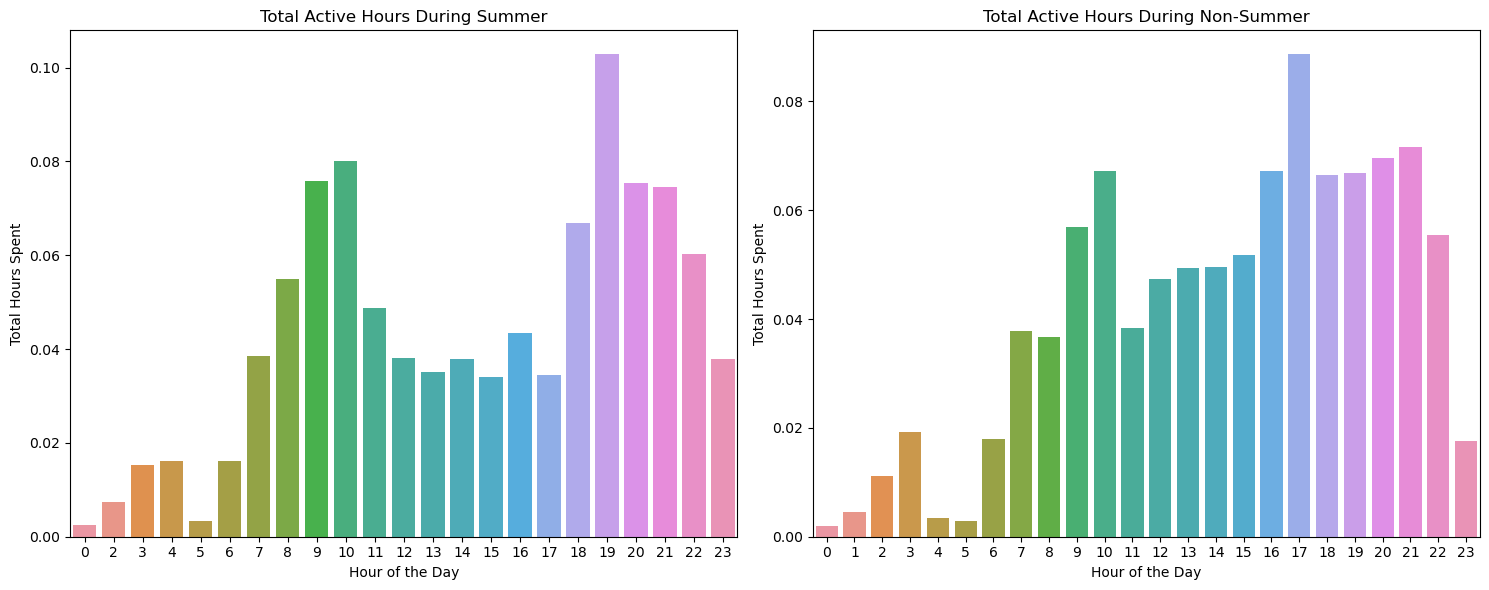

In [33]:


# Create a column to identify summer and non-summer months
data1["Month"] = pd.to_datetime(data1["Formatted_Time"]).dt.month
data1["Hour"] = pd.to_datetime(data1["Formatted_Time"]).dt.hour
data1["Season"] = data1["Month"].apply(lambda x: "Summer" if 6 <= x <= 8 else "Non-Summer")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Average active hours during summer
summer_df = data1[data1["Season"] == "Summer"]
average_hours_summer = summer_df.groupby("Hour").size().div(len(summer_df))
sns.barplot(x=average_hours_summer.index, y=average_hours_summer.values, ax=axes[0])
axes[0].set_title("Total Active Hours During Summer")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Total Hours Spent")

# Plot 2: Average active hours during non-summer
non_summer_df = data1[data1["Season"] == "Non-Summer"]
average_hours_non_summer = non_summer_df.groupby("Hour").size().div(len(non_summer_df))
sns.barplot(x=average_hours_non_summer.index, y=average_hours_non_summer.values, ax=axes[1])
axes[1].set_title("Total Active Hours During Non-Summer")
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("Total Hours Spent")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


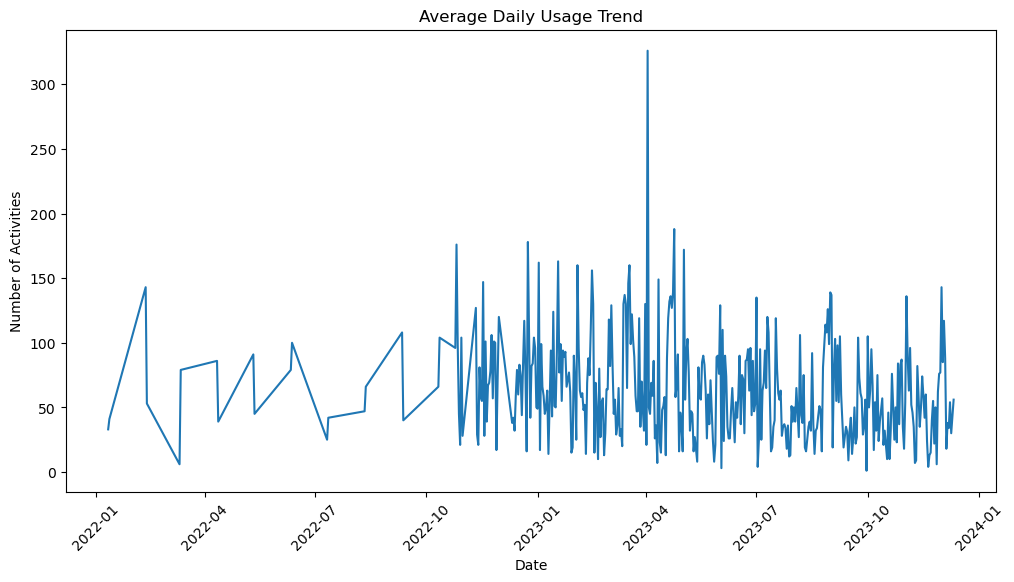

In [34]:




data1["Date"] = pd.to_datetime(data1["Formatted_Time"]).dt.date

# Calculate daily usage
daily_usage = data1.groupby("Date").size()

# Create a line plot to show the trend of average daily usage
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_usage.index, y=daily_usage.values)
plt.title("Average Daily Usage Trend")
plt.xlabel("Date")
plt.ylabel("Number of Activities")
plt.xticks(rotation=45)
plt.show()


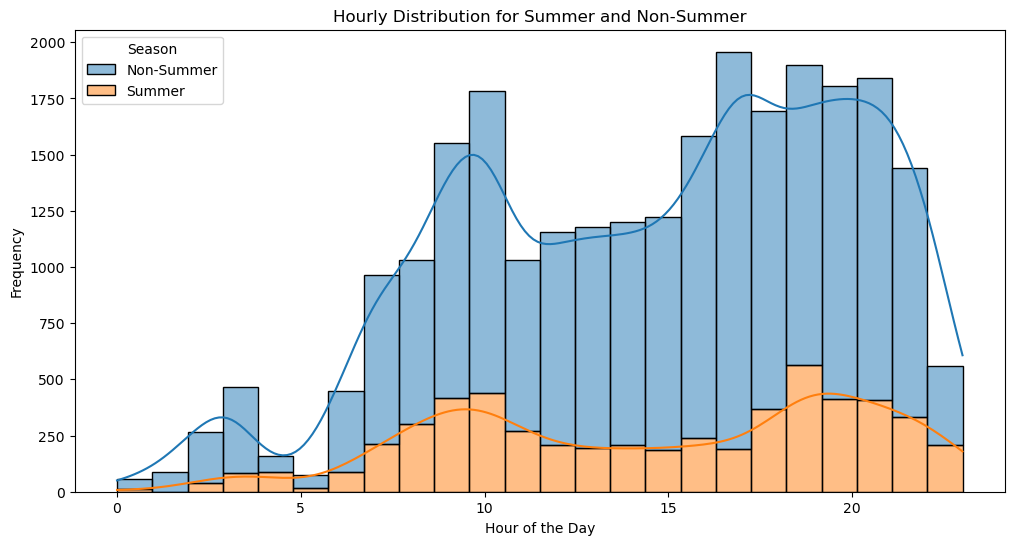

In [35]:

# Visualize hourly distribution for Summer and Non-Summer
plt.figure(figsize=(12, 6))
sns.histplot(data=data1, x='Hour', hue='Season', multiple='stack', bins=24, kde=True)
plt.title('Hourly Distribution for Summer and Non-Summer')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()


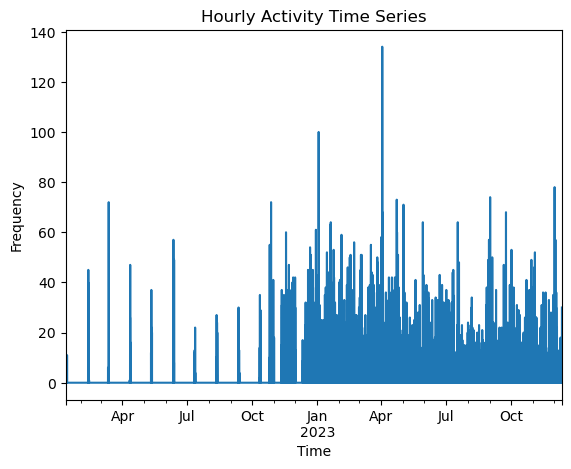

In [36]:

data1['Formatted_Time'] = pd.to_datetime(data1['Formatted_Time'])
time_series_data = data1.set_index('Formatted_Time')
time_series_data.resample('H').size().plot(title='Hourly Activity Time Series')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


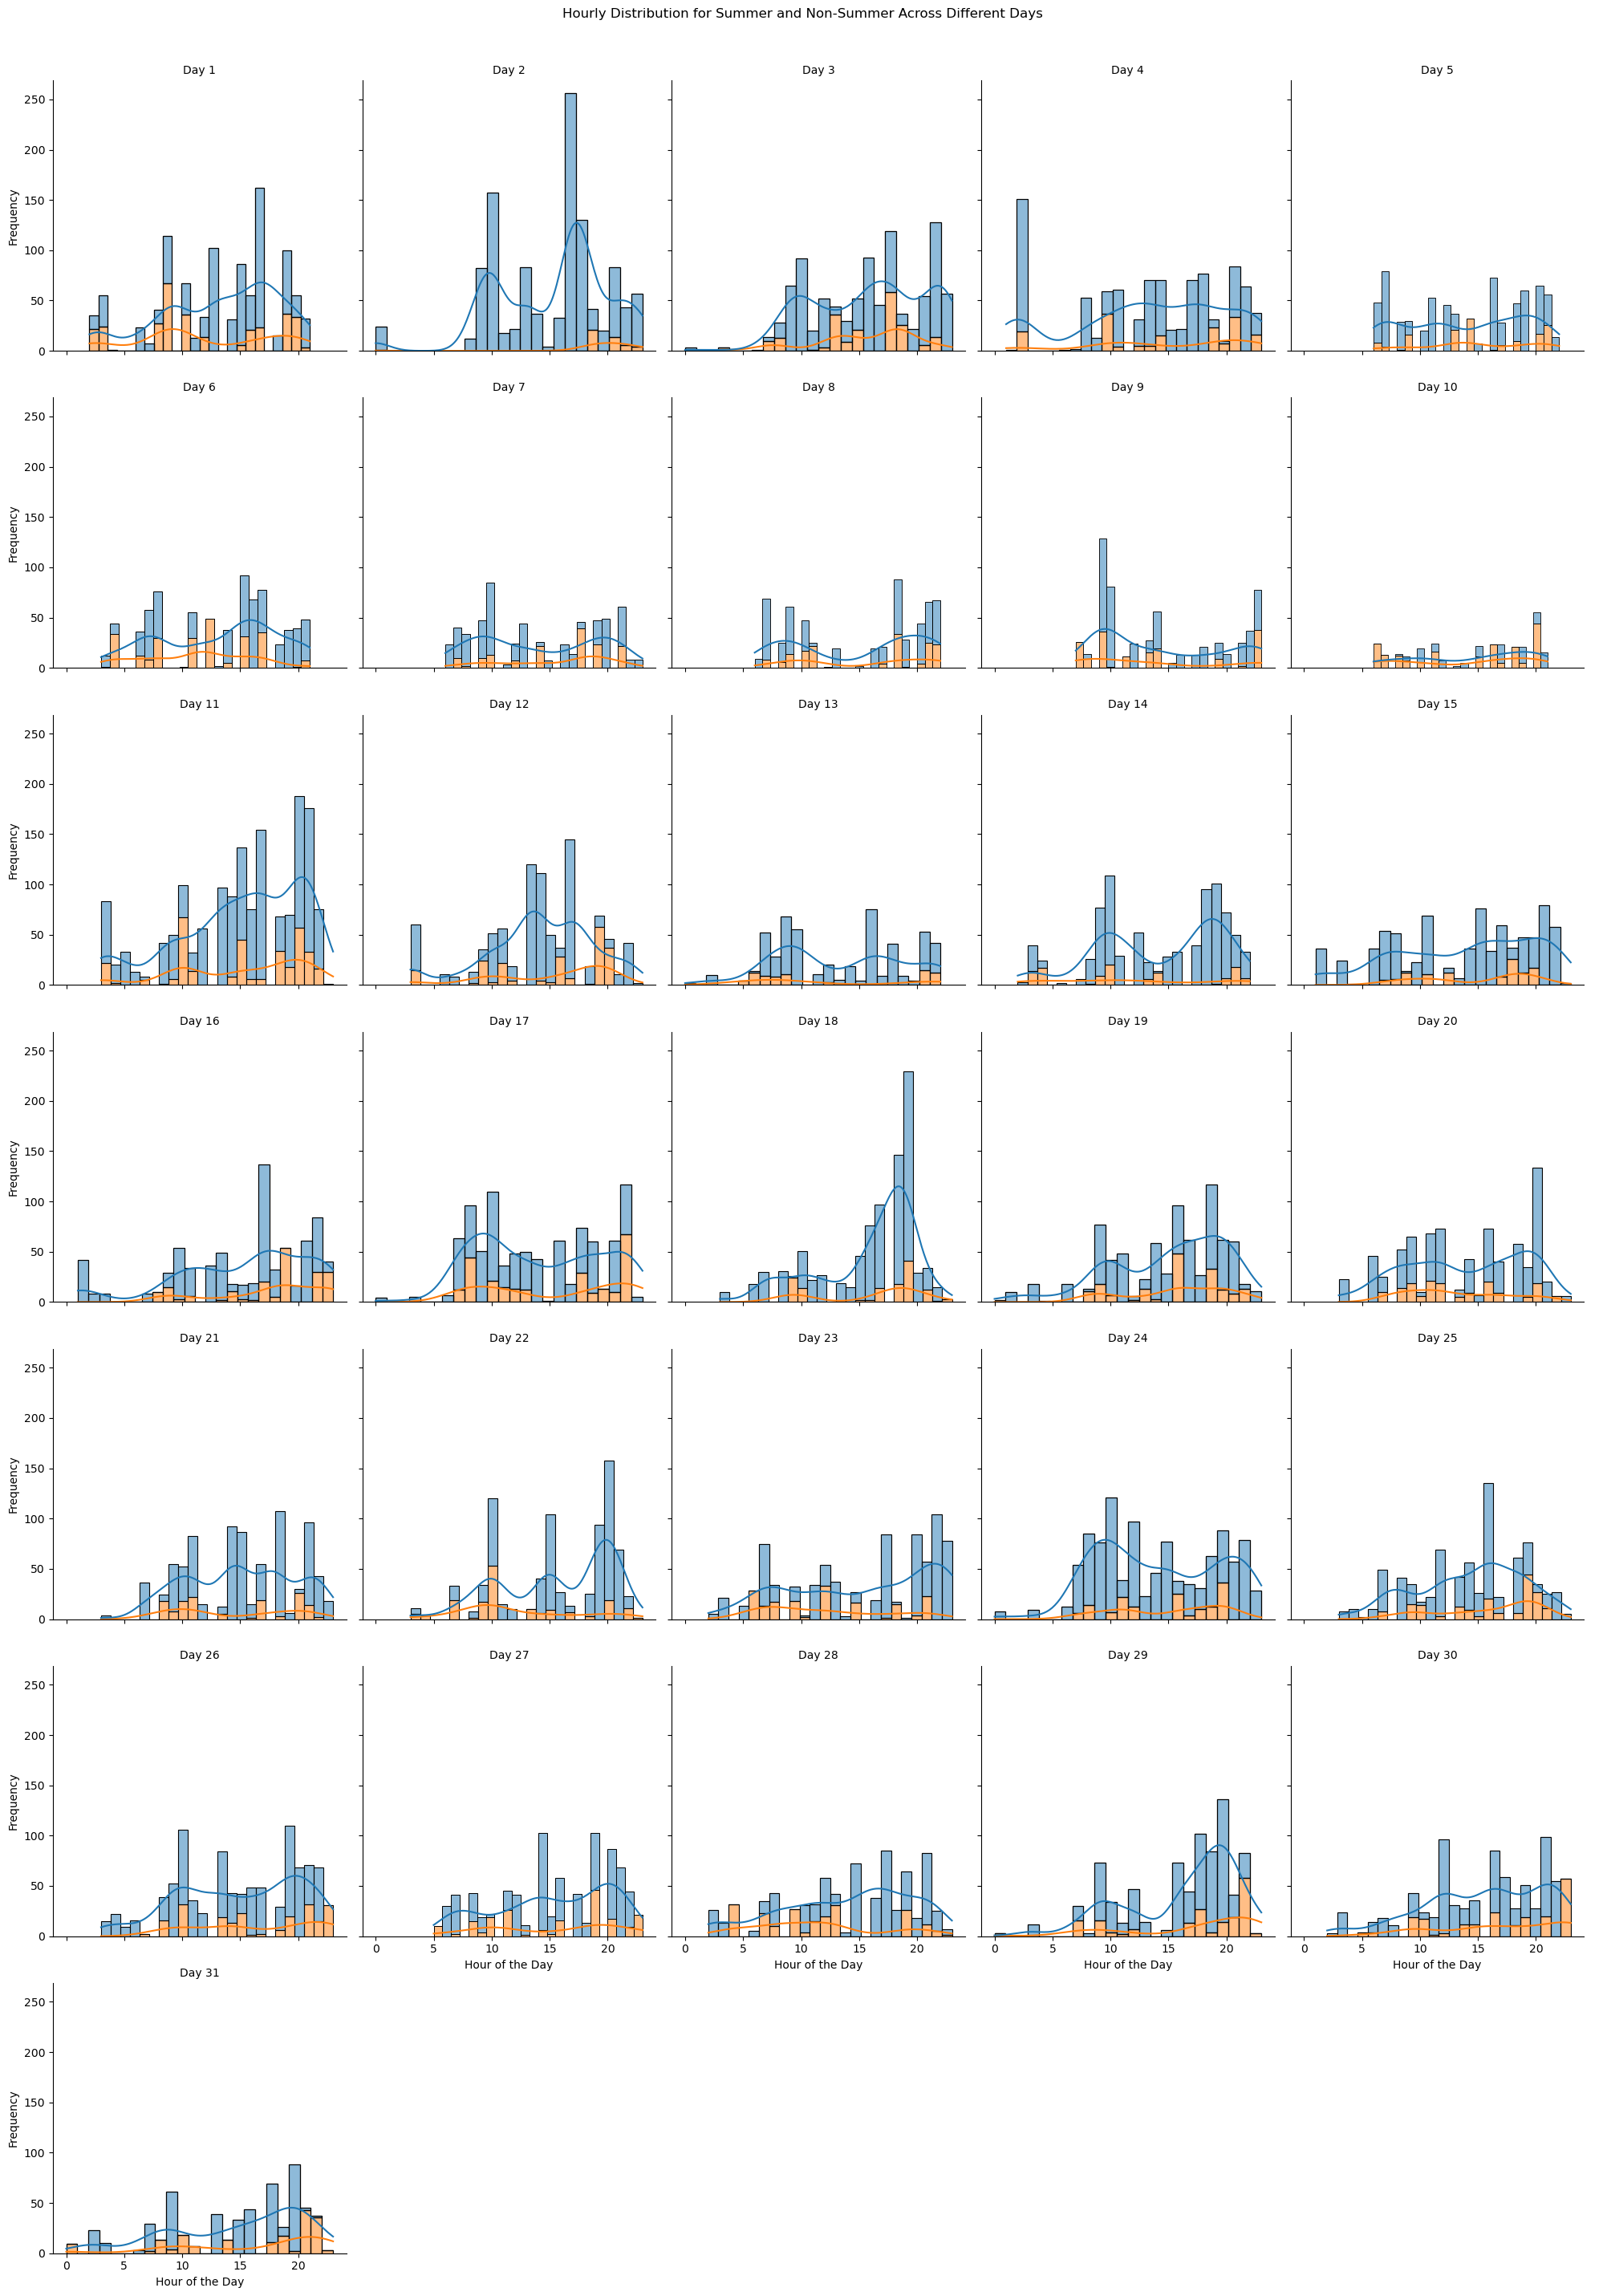

In [37]:



data1["Day"] = pd.to_datetime(data1["Formatted_Time"]).dt.day

# Visualize hourly distribution for Summer and Non-Summer across different days
g = sns.FacetGrid(data1, col="Day", col_wrap=5, height=4)
g.map_dataframe(sns.histplot, x='Hour', hue='Season', multiple='stack', bins=24, kde=True)
g.set_axis_labels("Hour of the Day", "Frequency")
g.set_titles("Day {col_name}")
g.add_legend()
plt.suptitle('Hourly Distribution for Summer and Non-Summer Across Different Days', y=1.02)
plt.show()


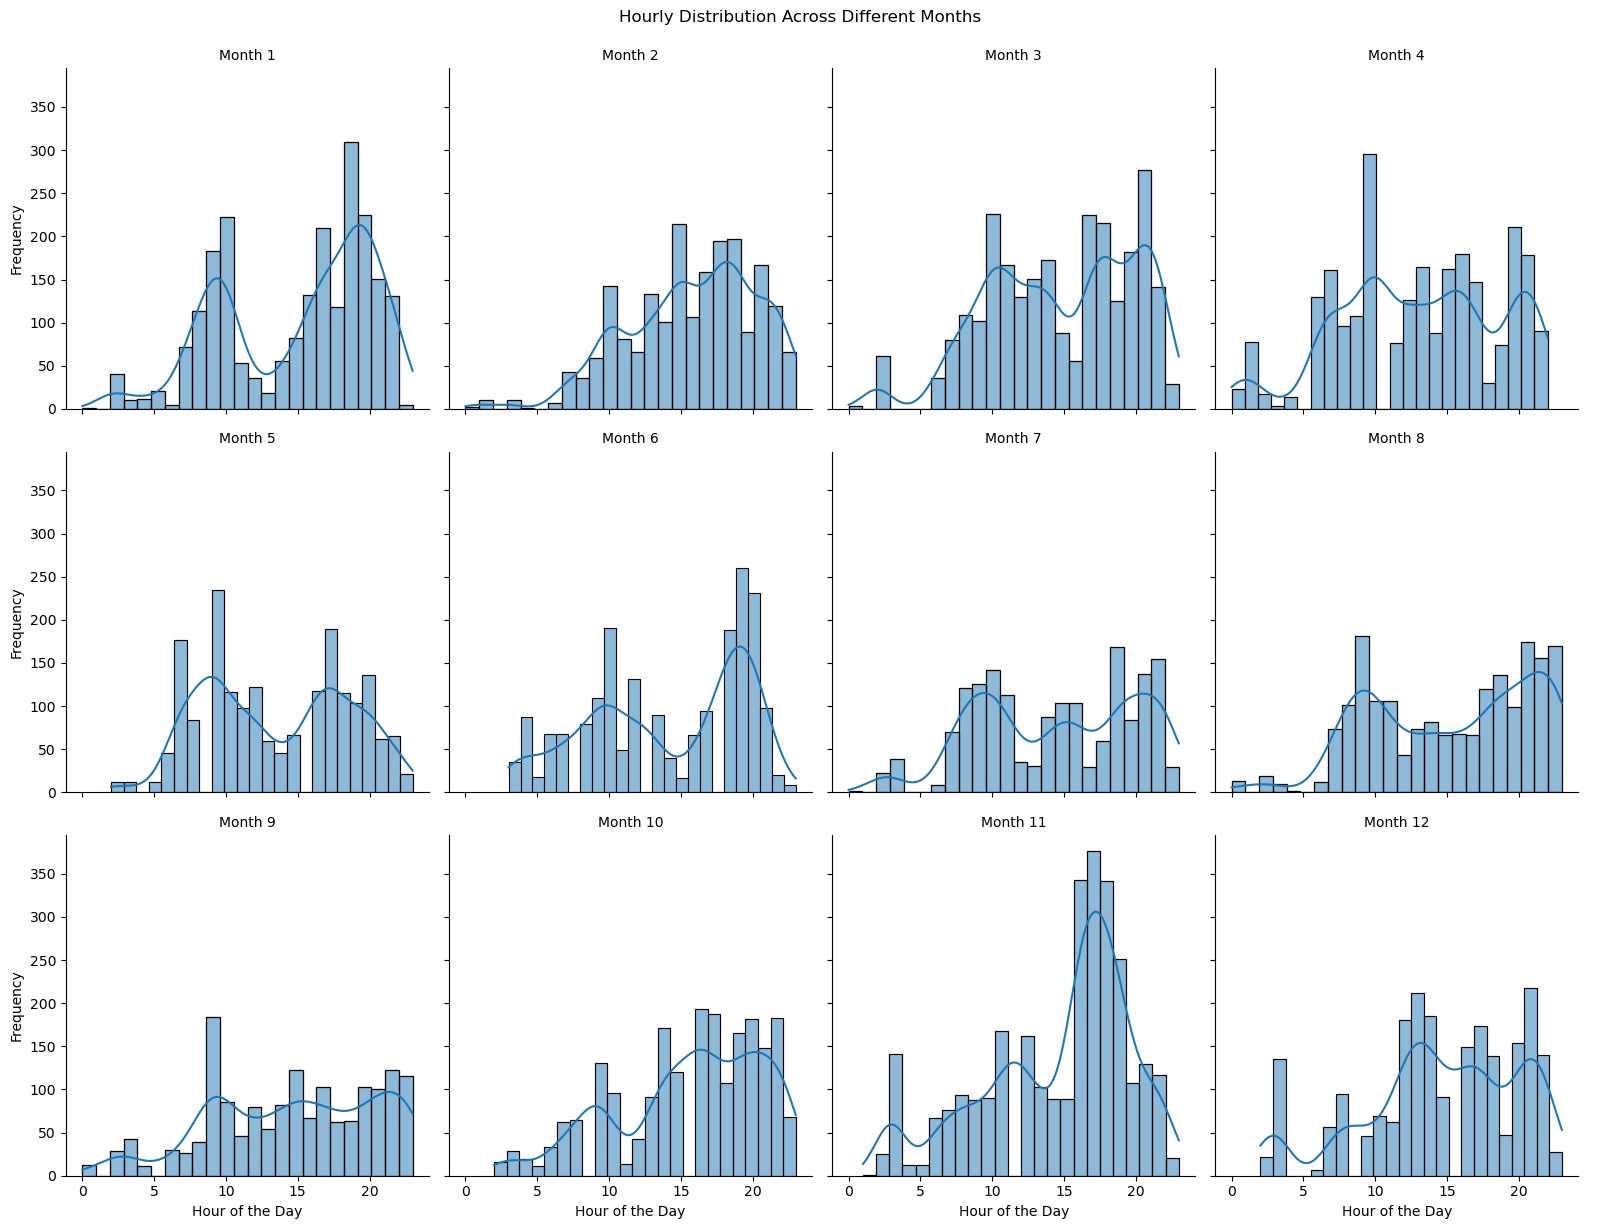

In [38]:


data1["Month"] = pd.to_datetime(data1["Formatted_Time"]).dt.month

# Visualize hourly distribution for Summer and Non-Summer across different months
g = sns.FacetGrid(data1, col="Month", col_wrap=4, height=4)
g.map_dataframe(sns.histplot, x='Hour', hue='Season', multiple='stack', bins=24, kde=True)
g.set_axis_labels("Hour of the Day", "Frequency")
g.set_titles("Month {col_name}")
g.add_legend()
plt.suptitle('Hourly Distribution Across Different Months', y=1.02)
plt.show()


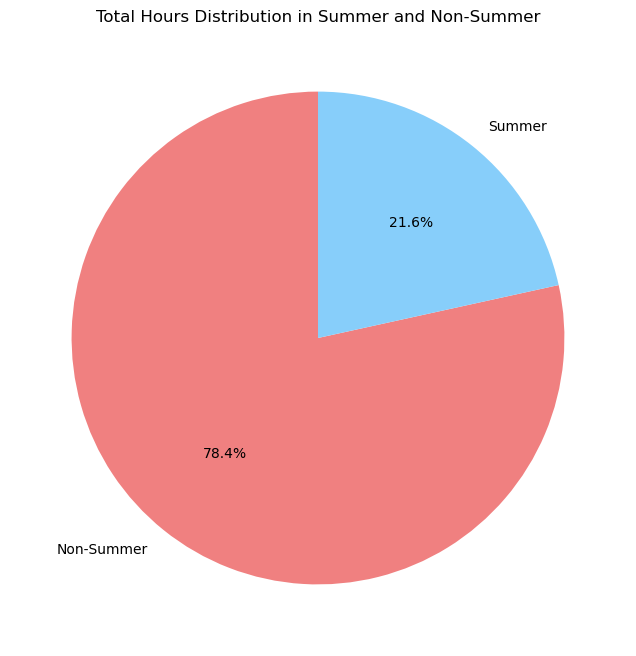

In [39]:

hour_distribution = data1.groupby('Season')['Hour'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(hour_distribution, labels=hour_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Total Hours Distribution in Summer and Non-Summer')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7764\4164015132.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data1.resample('D').sum()  # or .mean() if applicable


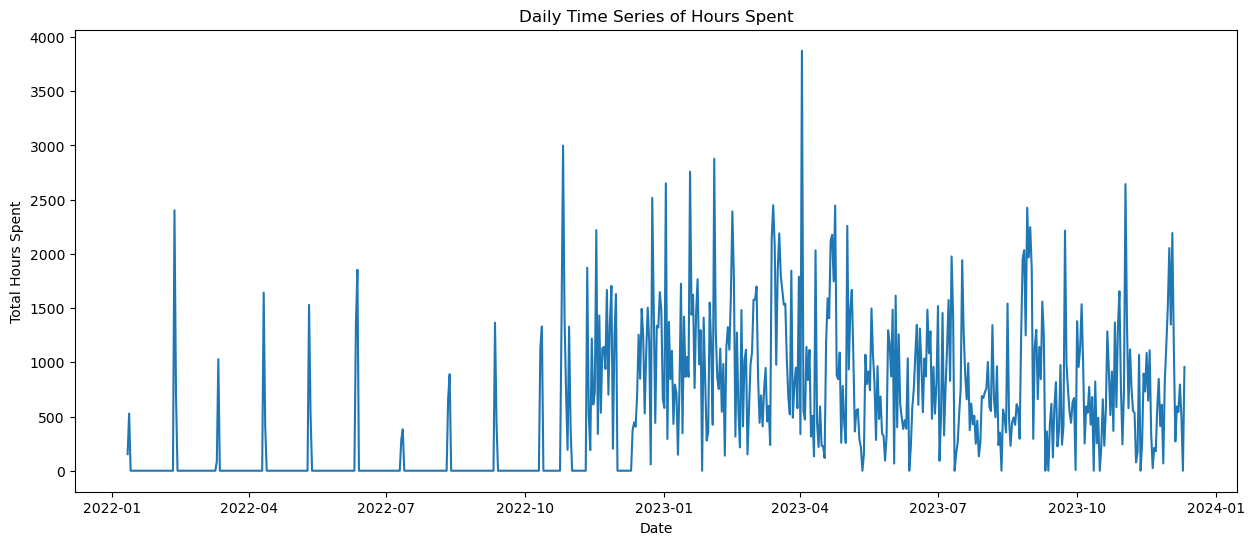

In [40]:



data1['Formatted_Time'] = pd.to_datetime(data1['Formatted_Time'])
data1.set_index('Formatted_Time', inplace=True)


daily_data = data1.resample('D').sum() 

# Plot the daily time series
plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_data.index, y=daily_data['Hour'])
plt.title('Daily Time Series of Hours Spent')
plt.xlabel('Date')
plt.ylabel('Total Hours Spent')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7764\1044906886.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data1.resample('D').sum()  # or .mean() if applicable


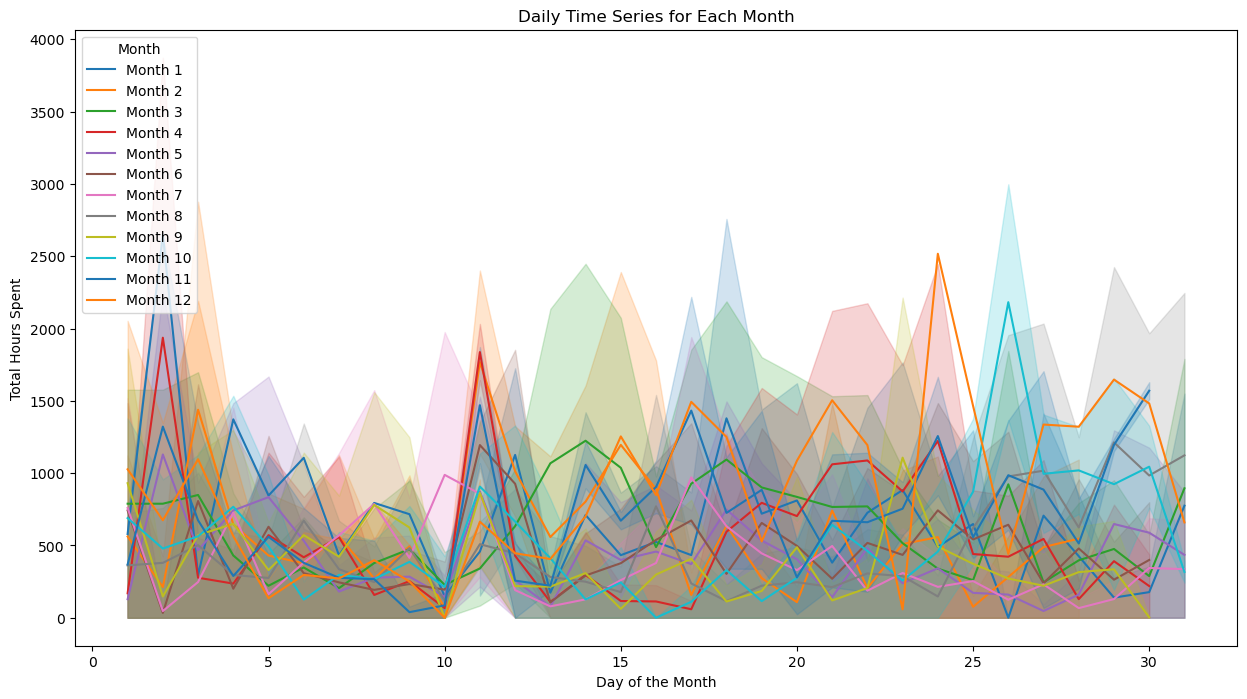

In [49]:



data1['Formatted_Time'] = pd.to_datetime(data1['Formatted_Time'])
data1.set_index('Formatted_Time', inplace=True)


daily_data = data1.resample('D').sum() 

# Extract month for grouping
daily_data['Month'] = daily_data.index.month

# Create a separate time series plot for each month
months = daily_data['Month'].unique()

plt.figure(figsize=(15, 8))

for month in months:
    month_data = daily_data[daily_data['Month'] == month]
    
    sns.lineplot(x=month_data.index.day, y=month_data['Hour'], label=f'Month {month}')

plt.title('Daily Time Series for Each Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Hours Spent')
plt.legend(title='Month', loc='upper left')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7764\574956691.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data1.resample('D').sum()  # or .mean() if applicable


<Figure size 1500x800 with 0 Axes>

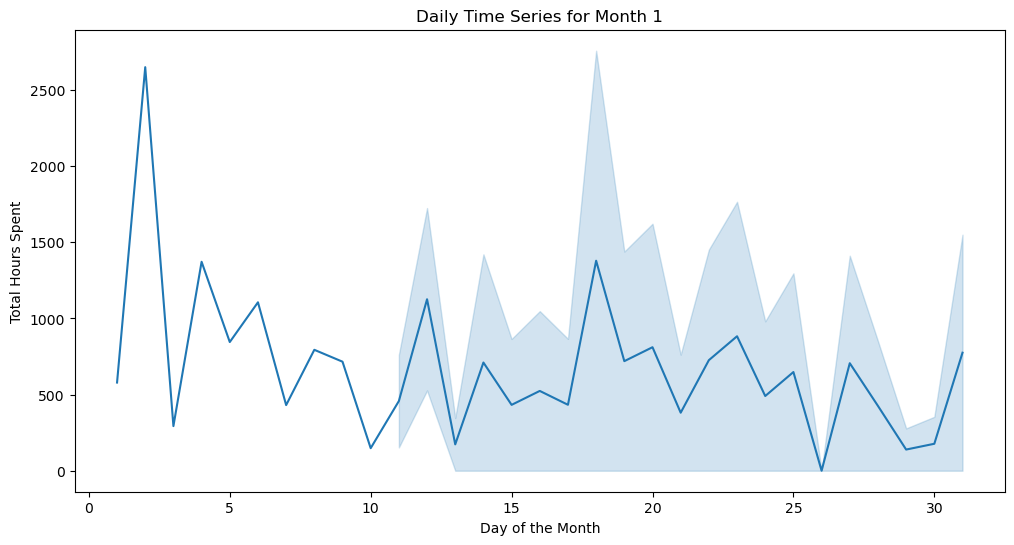

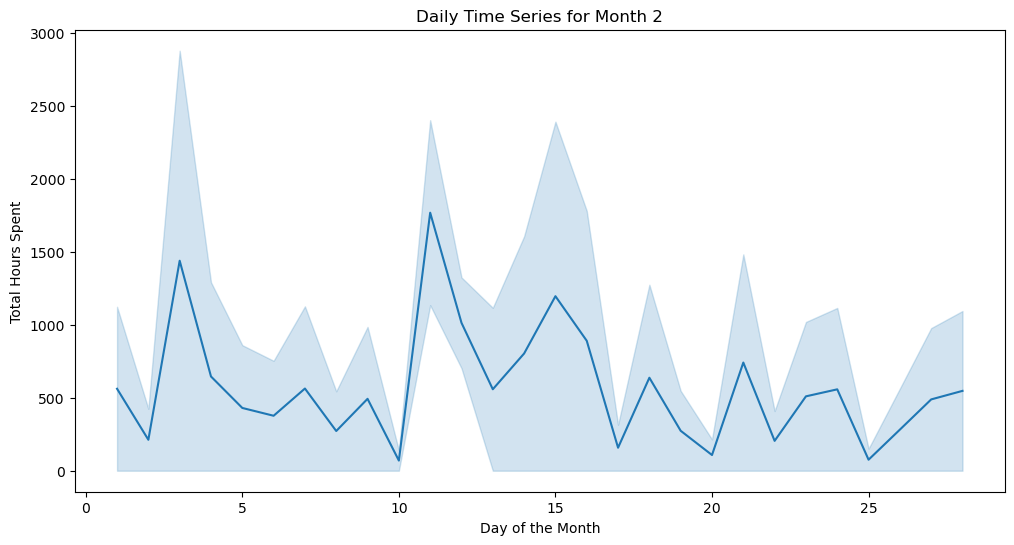

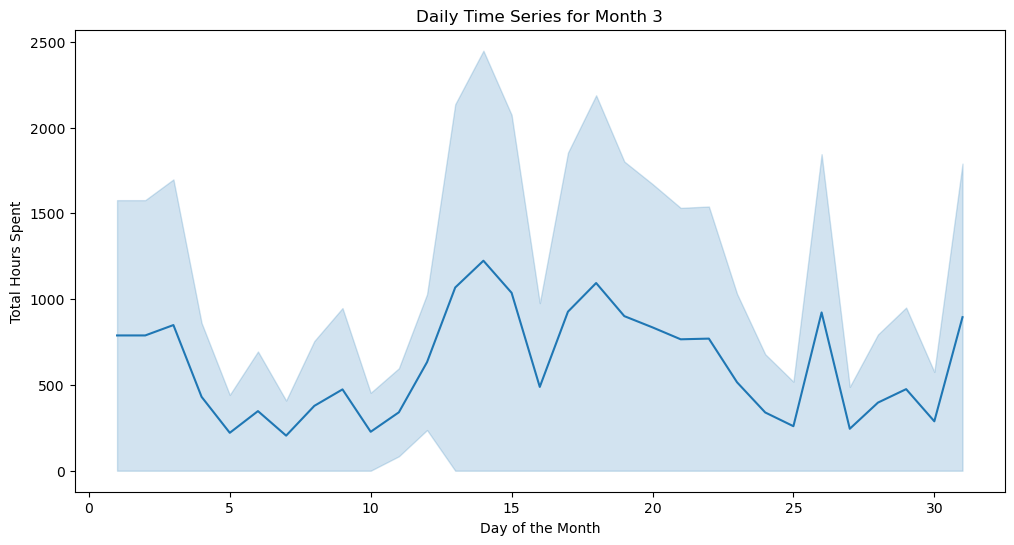

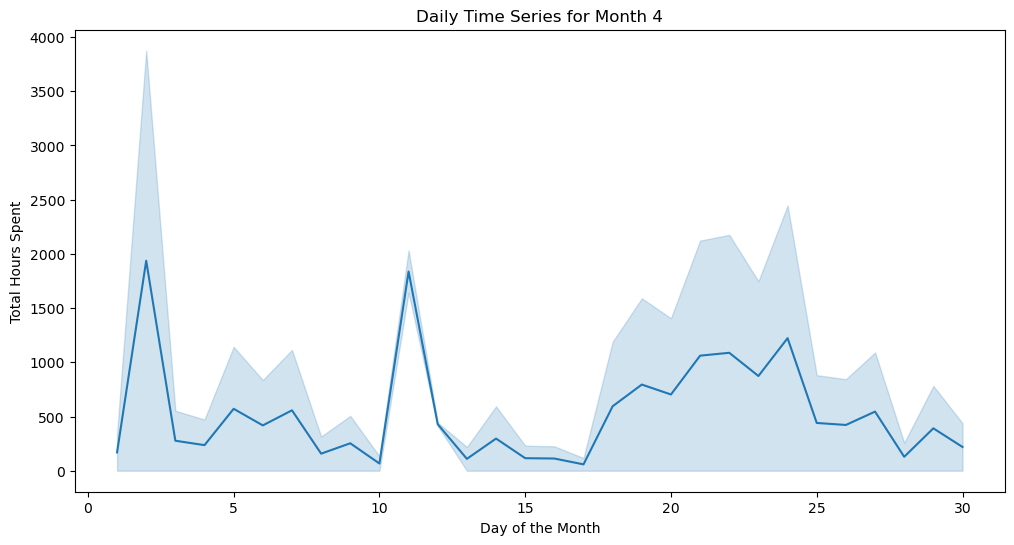

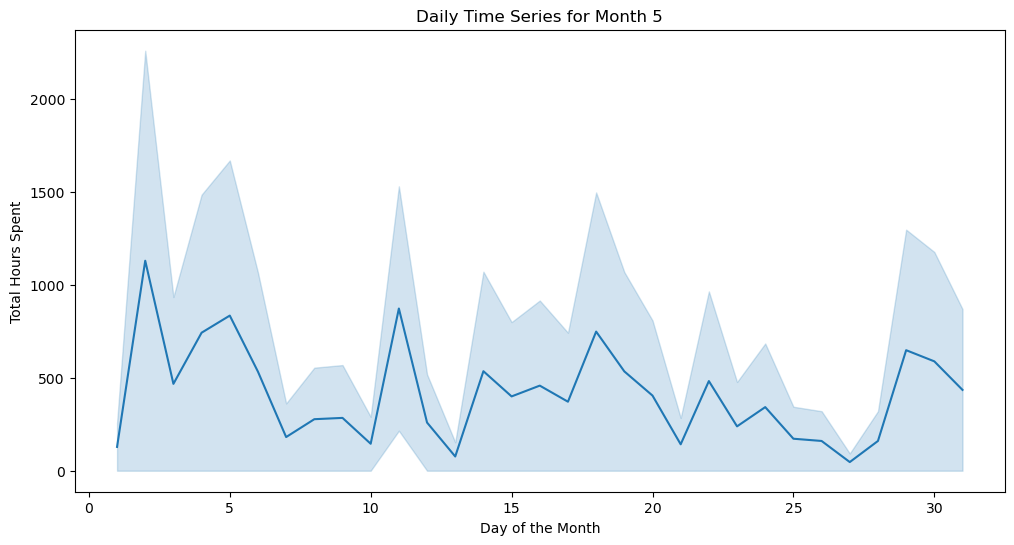

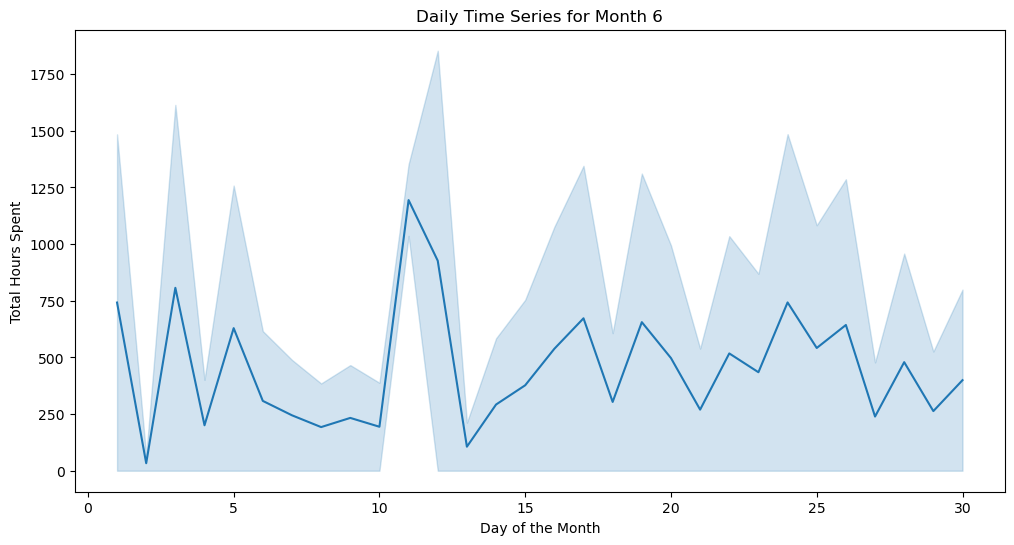

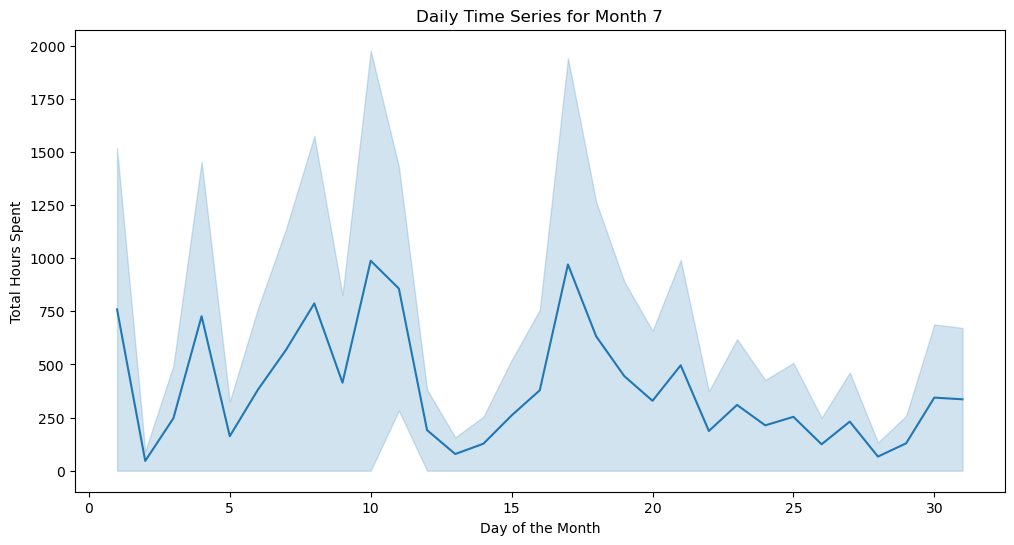

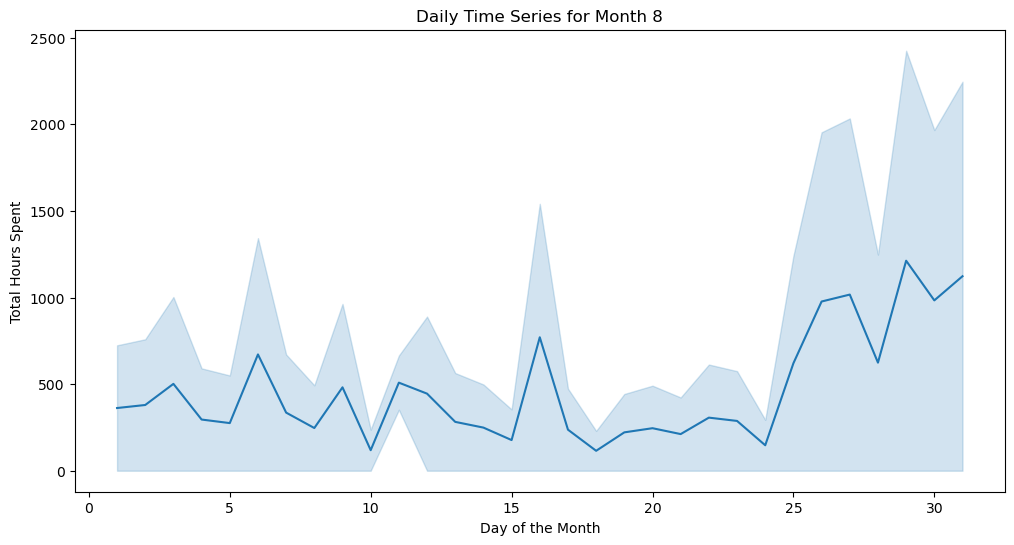

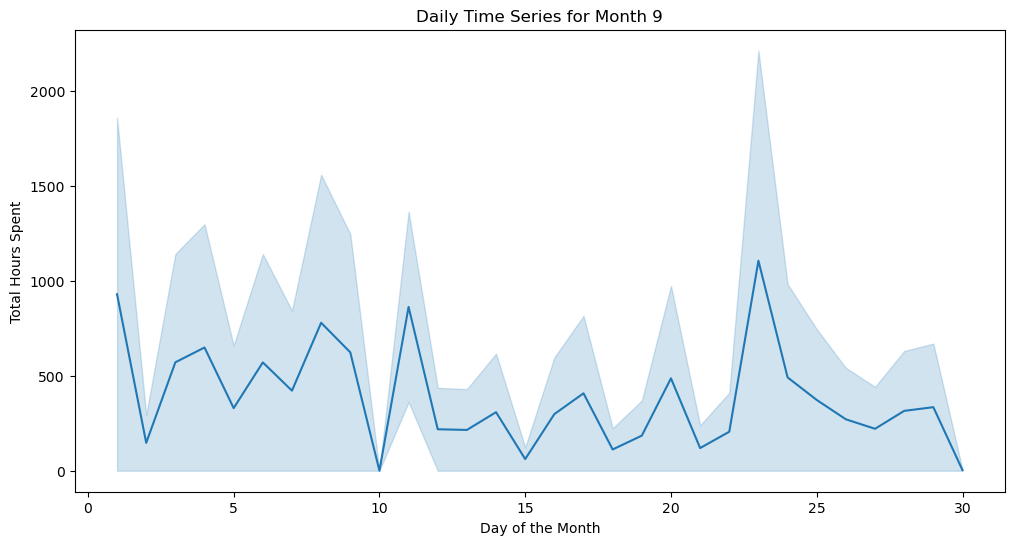

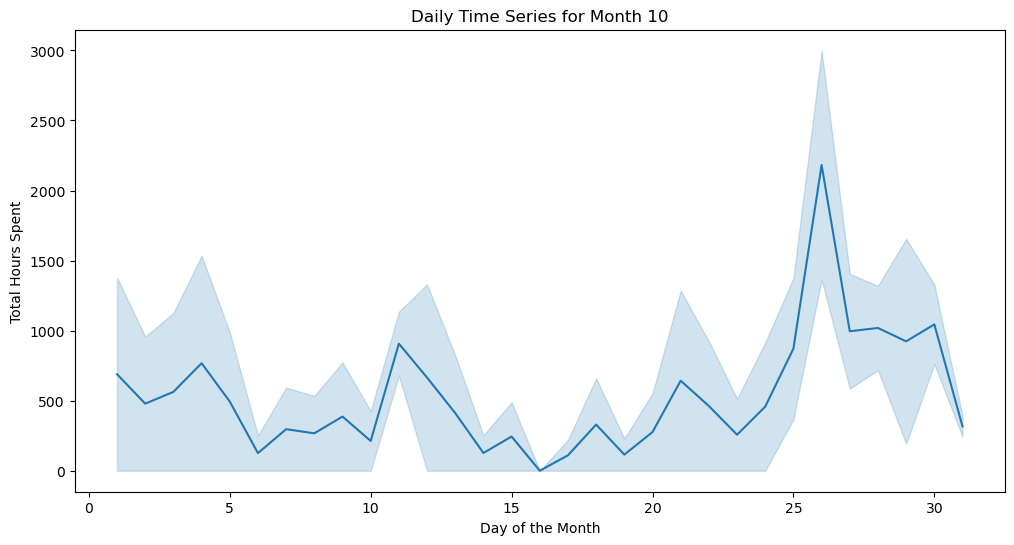

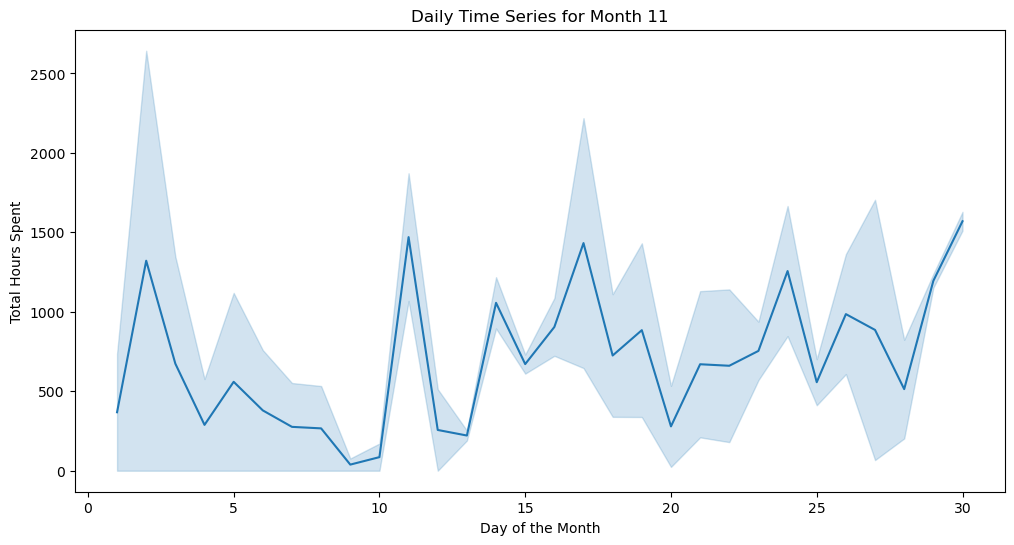

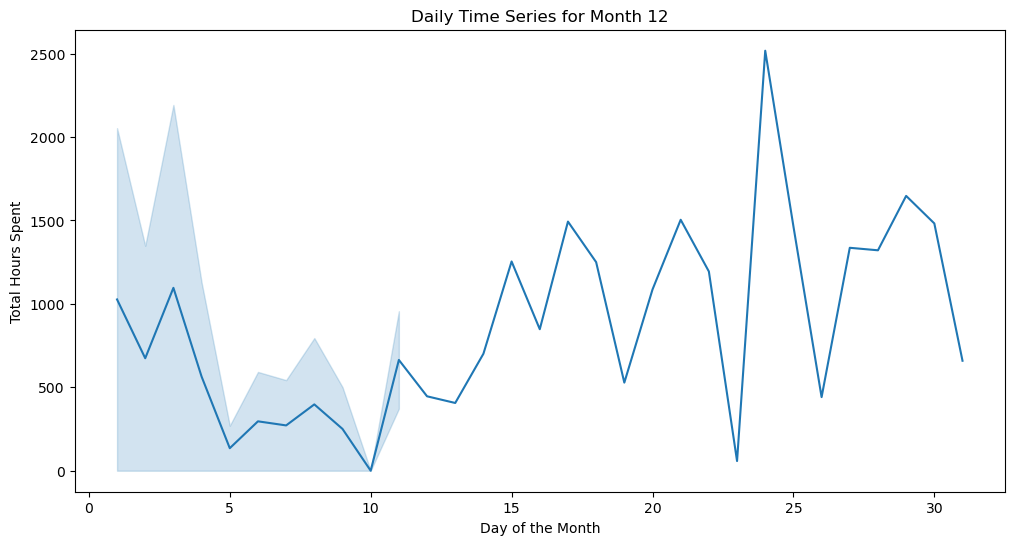

In [63]:



data1['Formatted_Time'] = pd.to_datetime(data1['Formatted_Time'])
data1.set_index('Formatted_Time', inplace=True)


daily_data = data1.resample('D').sum()  

# Extract month for grouping
daily_data['Month'] = daily_data.index.month

# Create a separate time series plot for each month
months = daily_data['Month'].unique()

plt.figure(figsize=(15, 8))

for month in months:
    month_data = daily_data[daily_data['Month'] == month]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=month_data.index.day, y=month_data['Hour'])
    
    plt.title(f'Daily Time Series for Month {month}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Total Hours Spent')
    plt.show()
